<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Scalable-Machine-Learning-on-Big-Data-using-Apache-Spark/blob/main/Apache_Spark_Plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install pyspark
import pyspark
from pyspark import SparkContext,SparkConf
from pyspark.sql import SparkSession
sc=SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
spark=SparkSession.builder.getOrCreate()

In [2]:
!wget https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true

--2021-06-05 09:21:13--  https://github.com/IBM/coursera/blob/master/coursera_ds/washing.parquet?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/IBM/skillsnetwork/blob/master/coursera_ds/washing.parquet?raw=true [following]
--2021-06-05 09:21:13--  https://github.com/IBM/skillsnetwork/blob/master/coursera_ds/washing.parquet?raw=true
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/IBM/skillsnetwork/raw/master/coursera_ds/washing.parquet [following]
--2021-06-05 09:21:13--  https://github.com/IBM/skillsnetwork/raw/master/coursera_ds/washing.parquet
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IBM/skillsnetwork/master/coursera_ds/washing.parquet [fo

In [3]:
!mv washing.parquet?raw=true washing.parquet

In [6]:
df=spark.read.parquet("washing.parquet")

In [7]:
df.count()

2058

In [13]:
df.createOrReplaceTempView("washing")
df.show()

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

In [15]:
res=spark.sql("select voltage from washing where voltage is not null")

In [16]:
result_array=res.rdd.map(lambda row : row.voltage).sample(False,0.1).collect()

In [18]:
result_array[:10]

[236, 237, 225, 235, 237, 231, 223, 234, 220, 244]

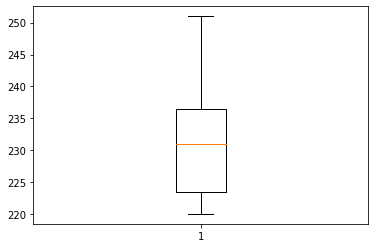

In [19]:
import matplotlib.pyplot as plt
plt.boxplot(result_array)
plt.show()

In [20]:
result=spark.sql("select voltage,ts from washing where voltage is not null order by ts asc")

In [22]:
result_rdd=result.rdd.sample(False,0.1).map(lambda row : (row.ts,row.voltage))
result_array_ts=result_rdd.map(lambda ts_voltage : ts_voltage[0]).collect()
result_array_voltage = result_rdd.map(lambda ts_voltage: ts_voltage[1]).collect()

In [23]:
result_array_voltage[:10]

[230, 239, 220, 237, 233, 222, 224, 221, 221, 232]

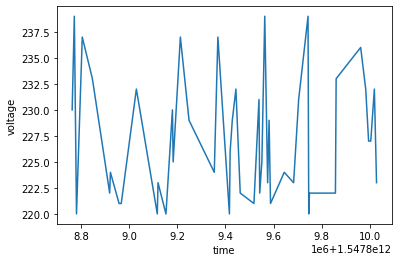

In [24]:
plt.plot(result_array_ts,result_array_voltage)
plt.xlabel("time")
plt.ylabel("voltage")
plt.show()

In [29]:
spark.sql("select min(ts),max(ts) from washing ").show()

+-------------+-------------+
|      min(ts)|      max(ts)|
+-------------+-------------+
|1547808720911|1547810064867|
+-------------+-------------+



In [44]:
result=spark.sql("""
select voltage,ts from washing 
where voltage is not null and
ts > 1547808720911 and
    ts <= 1547810064867+3600000 
order by ts asc
""")

In [45]:
result_rdd=result.rdd.map(lambda row : (row.ts,row.voltage))
result_array_ts = result_rdd.map(lambda ts_voltage: ts_voltage[0]).collect()
result_array_voltage = result_rdd.map(lambda ts_voltage: ts_voltage[1]).collect()

In [41]:
result_rdd.collect()

[]

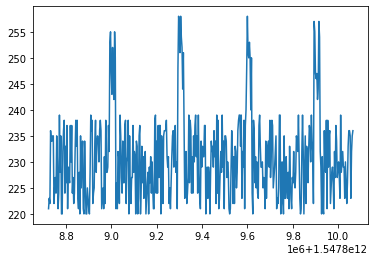

In [46]:
plt.plot(result_array_ts,result_array_voltage)

In [47]:
result_df = spark.sql("""
select hardness,temperature,flowrate from washing
    where hardness is not null and 
    temperature is not null and 
    flowrate is not null
""")
result_rdd = result_df.rdd.sample(False,0.1).map(lambda row : (row.hardness,row.temperature,row.flowrate))
result_array_hardness = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[0]).collect()
result_array_temperature = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[1]).collect()
result_array_flowrate = result_rdd.map(lambda hardness_temperature_flowrate: hardness_temperature_flowrate[2]).collect()

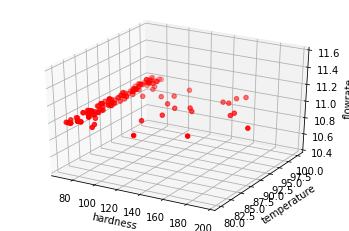

In [48]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(result_array_hardness,result_array_temperature,result_array_flowrate, c='r', marker='o')

ax.set_xlabel('hardness')
ax.set_ylabel('temperature')
ax.set_zlabel('flowrate')

plt.show()

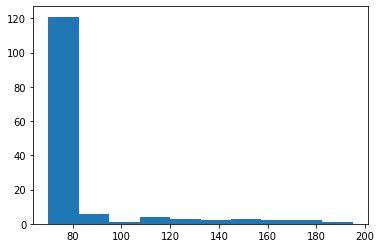

In [49]:
plt.hist(result_array_hardness)
plt.show()